<a href="https://colab.research.google.com/github/vasudeva4040/Homework2/blob/main/Homework_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q7: Decision Tree Classifier
Max Depth=1 | Train Accuracy: 0.667 | Test Accuracy: 0.667


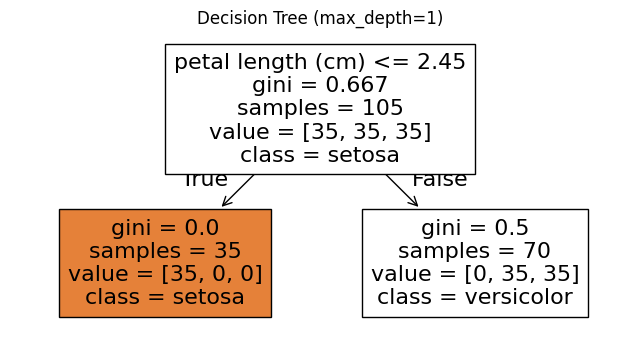

Max Depth=2 | Train Accuracy: 0.971 | Test Accuracy: 0.889


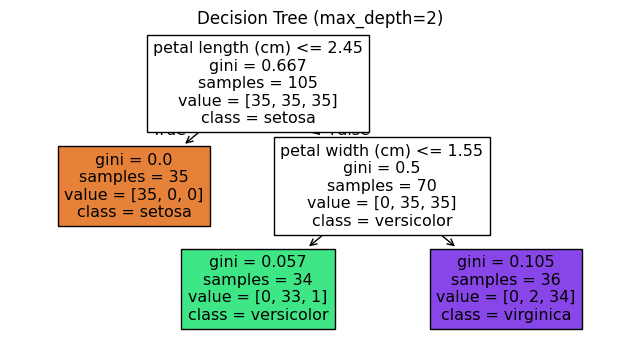

Max Depth=3 | Train Accuracy: 0.981 | Test Accuracy: 0.978


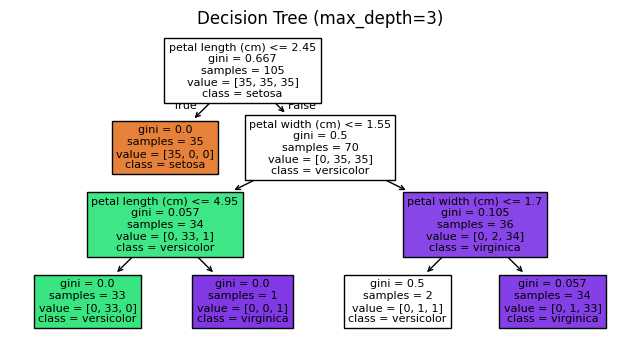

Underfitting: High bias, low train/test accuracy at low max_depth (e.g., 1)
Overfitting: High train but low test accuracy at high max_depth (large)

Q8: kNN Classification with Boundaries


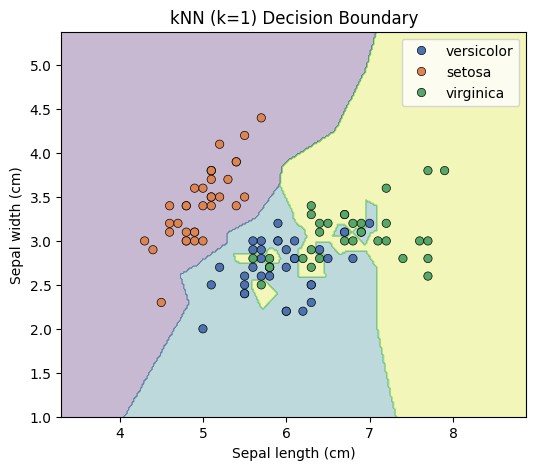

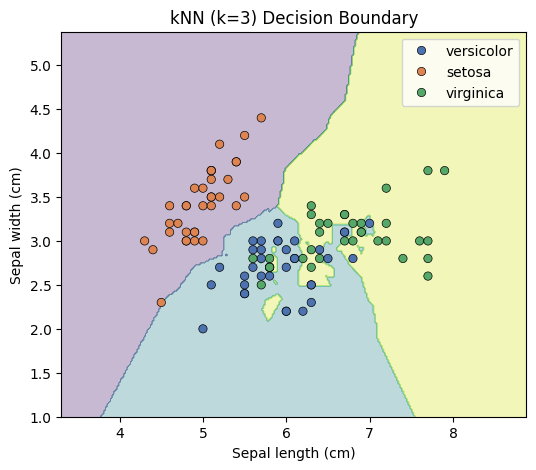

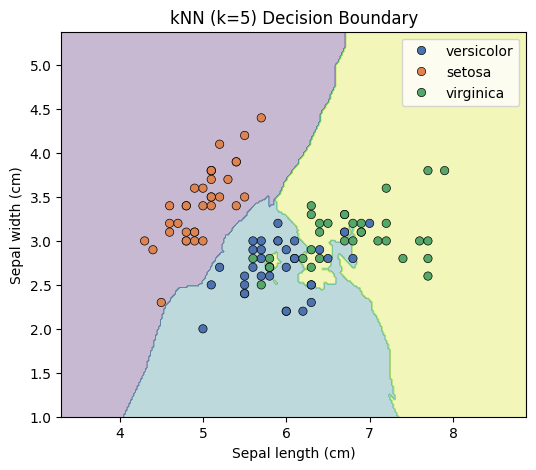

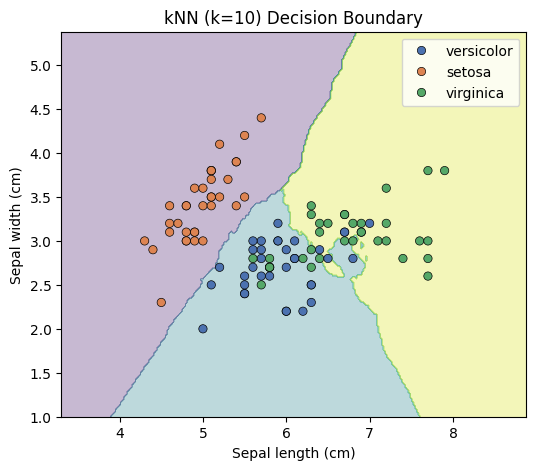

Low k: More jagged/fine boundaries, can overfit.
High k: Smoother boundaries, may underfit.

Q9: kNN Performance Evaluation (k=5)
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



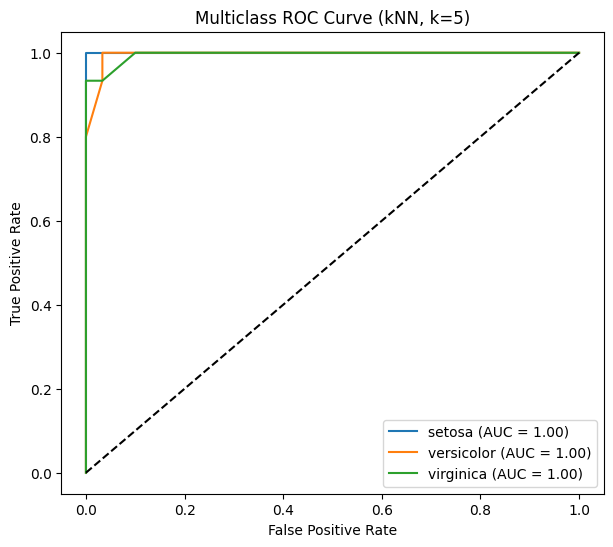

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc, accuracy_score
)
from sklearn.preprocessing import label_binarize

# Load the Iris dataset: multiclass classification
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split dataset for train/test (Stratify for fair distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# SECTION Q7: Decision Tree Classifier
print("Q7: Decision Tree Classifier")
for max_depth in [1, 2, 3]:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    print(f"Max Depth={max_depth} | Train Accuracy: {train_acc:.3f} | Test Accuracy: {test_acc:.3f}")
    plt.figure(figsize=(8, 4))
    plot_tree(clf, feature_names=iris.feature_names, class_names=target_names, filled=True)
    plt.title(f"Decision Tree (max_depth={max_depth})")
    plt.show()
print("Underfitting: High bias, low train/test accuracy at low max_depth (e.g., 1)\nOverfitting: High train but low test accuracy at high max_depth (large)\n")

# SECTION Q8: kNN Decision Boundary Visualization (Only sepal length/width)
print("Q8: kNN Classification with Boundaries")
# Use only sepal length (0) and sepal width (1)
X2d = X[:, :2]
X2d_train, X2d_test, y2d_train, y2d_test = train_test_split(
    X2d, y, test_size=0.30, random_state=42, stratify=y
)
k_list = [1, 3, 5, 10]
h = .02  # step size for mesh

x_min, x_max = X2d[:, 0].min() - 1, X2d[:, 0].max() + 1
y_min, y_max = X2d[:, 1].min() - 1, X2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2d_train, y2d_train)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(
        x=X2d_train[:, 0], y=X2d_train[:, 1], hue=iris.target_names[y2d_train], palette='deep', edgecolor='k'
    )
    plt.title(f"kNN (k={k}) Decision Boundary")
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Sepal width (cm)')
    plt.legend()
    plt.show()
print("Low k: More jagged/fine boundaries, can overfit.\nHigh k: Smoother boundaries, may underfit.\n")

# SECTION Q9: kNN Performance Evaluation (k=5, all features)
print("Q9: kNN Performance Evaluation (k=5)")
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred = knn5.predict(X_test)

# Confusion matrix and metrics
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# ROC and AUC (multiclass, so binarize)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_score = knn5.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(7, 6))
for i, name in enumerate(target_names):
    plt.plot(fpr[i], tpr[i], label=f"{name} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (kNN, k=5)")
plt.legend()
plt.show()

# End of Part B
